# 0. Préparation

In [ ]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CHEMIN = 'drive/My Drive/Colab Notebooks/ocr_data_scientist/P3 Application alimentation/'
FILENAME = 'en.openfoodfacts.org.products.csv'

In [ ]:
main_df = pd.read_csv(CHEMIN + FILENAME, sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,12,18,19,20,21,25,26,27,29,50,62,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def without_en(string_):
    """Fonction qui retourne le nom du pays sans les caractères "en:"."""
    return(string_[3:].capitalize())

### Nettoyage

In [ ]:
delete_list = ['states_en',
 'biotin_100g',
 '-cerotic-acid_100g',
 'iodine_100g',
 'quantity',
 'image_ingredients_url',
 'caffeine_100g',
 'states',
 '-insoluble-fiber_100g',
 'ph_100g',
 'energy-from-fat_100g',
 'vitamin-d_100g',
 'brands_tags',
 'states_tags',
 '-capric-acid_100g',
 'casein_100g',
 'nova_group',
 'polyols_100g',
 'phylloquinone_100g',
 '-caproic-acid_100g',
 'polyunsaturated-fat_100g',
 'vitamin-k_100g',
 'omega-6-fat_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'main_category',
 'countries_en',
 'image_small_url',
 'taurine_100g',
 'nucleotides_100g',
 'calcium_100g',
 'folates_100g',
 'serving_size',
 '-glucose_100g',
 '-maltodextrins_100g',
 'pantothenic-acid_100g',
 'beta-glucan_100g',
 'packaging',
 'energy-kcal_100g',
 'starch_100g',
 '-arachidic-acid_100g',
 'first_packaging_code_geo',
 'energy-kj_100g',
 'fluoride_100g',
 '-linoleic-acid_100g',
 'energy_100g',
 '-behenic-acid_100g',
 'copper_100g',
 'vitamin-c_100g',
 'image_ingredients_small_url',
 'vitamin-b9_100g',
 'ingredients_from_palm_oil_tags',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 '-arachidonic-acid_100g',
 'beta-carotene_100g',
 'vitamin-a_100g',
 'potassium_100g',
 'chlorophyl_100g',
 '-gamma-linolenic-acid_100g',
 'fruits-vegetables-nuts-dried_100g',
 'molybdenum_100g',
 'nutriscore_grade',
 'main_category_en',
 'vitamin-b1_100g',
 'additives_n',
 '-oleic-acid_100g',
 '-maltose_100g',
 'inositol_100g',
 'choline_100g',
 'trans-fat_100g',
 'origins_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'created_t',
 'vitamin-e_100g',
 'emb_codes',
 'traces_tags',
 'pnns_groups_1',
 'serving_quantity',
 'salt_100g',
 'silica_100g',
 'omega-3-fat_100g',
 'serum-proteins_100g',
 '-lactose_100g',
 'traces',
 'phosphorus_100g',
 'fruits-vegetables-nuts_100g',
 'chloride_100g',
 'cocoa_100g',
 '-butyric-acid_100g',
 'proteins_100g',
 '-lauric-acid_100g',
 'carnitine_100g',
 'url',
 'nutrition-score-fr_100g',
 'collagen-meat-protein-ratio_100g',
 'bicarbonate_100g',
 'manufacturing_places_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'additives_tags',
 'omega-9-fat_100g',
 '-fructose_100g',
 '-myristic-acid_100g',
 'glycemic-index_100g',
 'brand_owner',
 '-alpha-linolenic-acid_100g',
 'carbohydrates_100g',
 'image_nutrition_url',
 'chromium_100g',
 'vitamin-b6_100g',
 'pnns_groups_2',
 'categories_en',
 'ingredients_from_palm_oil_n',
 'fat_100g',
 'emb_codes_tags',
 '-stearic-acid_100g',
 'image_url',
 'last_modified_t',
 'saturated-fat_100g',
 'categories_tags',
 'manganese_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'sodium_100g',
 'packaging_tags',
 'selenium_100g',
 'vitamin-b2_100g',
 '-sucrose_100g',
 'monounsaturated-fat_100g',
 'zinc_100g',
 '-soluble-fiber_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-montanic-acid_100g',
 'magnesium_100g',
 'nutrition-score-uk_100g',
 'vitamin-b12_100g',
 'image_nutrition_small_url',
 '-caprylic-acid_100g',
 'vitamin-pp_100g',
 'labels_tags',
 'nutriscore_score',
 '-palmitic-acid_100g']

In [ ]:
keep_list = list(set([column for column in main_df.columns]) - set(delete_list))

In [ ]:
explor_df = main_df[keep_list]

# 1. Analyse univariées

In [ ]:
def without_en(string_, n):
    """Fonction qui retourne le nom du pays sans les caractères "en:"."""
    return(string_[n:].capitalize())

In [ ]:
def get_pareto(dataframe_, column_, filter_=10):
    """Function that takes a list and returns a bar graph of the most common
    elements of the list"""
    # Vérifier que le nom de colonne est bien dans le DataFrame
    if column_ not in dataframe_.columns:
        return 'La colonne n\'est pas dans le DataFrame'
    
    # Supprimer les éléments nuls de la liste
    temp_list = dataframe_[dataframe_[column_].notnull()][column_]

    # Créer le compteur
    temp_counter = Counter(temp_list).most_common(filter_)

    # Extraire la liste des pays et leur fréquence d'apparition
    categories, frequencies = zip(*temp_counter)
    frequencies = [frequency/len(temp_list)*100 for frequency in frequencies]

    #Tracer le graphique
    plt.figure(figsize=(math.sqrt(filter_*2), math.sqrt(filter_*2)))
    plt.title('Fréquence d\'apparition des {}. {} premiers éléments'.format(column_, filter_))
    plt.xlabel('Occurrences en % de la taille de l\'échantillon')
    plt.ylabel('Catégories')
    ax = plt.axes()
    ax.xaxis.grid() # vertical lines
    plt.barh(categories, frequencies, color='orange', edgecolor='k')

### 1.1 Indicateur created_time

In [ ]:
def date_counter(date_series_):
    """Fonction qui retourne un histogramme du nombre de création d'article
    par année."""
    #
    if type(date_series_) == type(pd.Series()):
        date_list = []
        for element in date_series_:
            date_time_str = element.replace('T', ' ')[:-1]
            date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
            date_list.append(date_time_obj.year)
        temp_counter = Counter(date_list)
        plt.figure(figsize=(8,8))
        ax = plt.axes()        
        #ax.xaxis.grid()
        ax.yaxis.grid()
        plt.title('Nombre de création d\'articles par année')
        plt.xlabel('Année de création')
        plt.ylabel('Nombre d\'articles')
        plt.bar(temp_counter.keys(), temp_counter.values(), color='orange',
                edgecolor='k')
    else:
        print('Argument must be a pandas Series')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


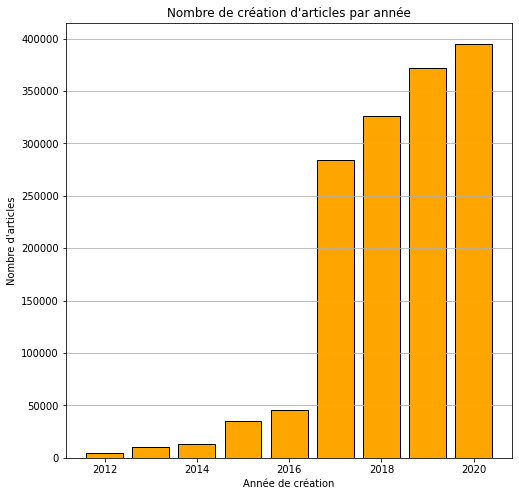

In [ ]:
date_counter(explor_df['created_datetime'])

### 1.2 Indicateur creator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


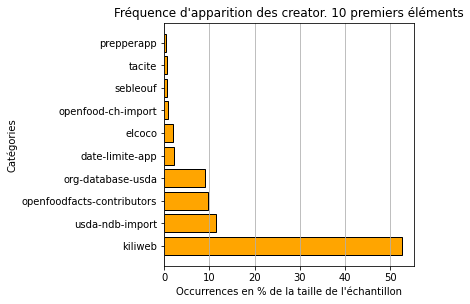

In [ ]:
get_pareto(explor_df, 'creator')

### 1.3 Indicateur countries_tags

In [ ]:
def get_countries_v2(list_=explor_df['countries_tags'],
                     sample_=len(explor_df['countries_tags']),
                     filter_=20,
                     parameter='pays',
                     n_=3):
    """Fonction qui retourne les différents pays contenus dans les éléments
    de la colonne countries_tags"""
    # Créer la liste des pays ayant un tiret -
    hyphen_list = ['en:united-kingdom',
                   'en:united-states']

    # Nettoyer la liste des countries tags
    temp_list = []
    for countrytags in list_:
        try:
            for string in countrytags.split(','):
                # Nettoyer la liste donnée des éléments du type "Germany-deutsch", qui ne
                # sont pas comptabilisés avec les éléments "Germany".
                try:
                    if '-' in string and string not in hyphen_list:
                        string = string.split('-')[0]
                        temp_list.append(without_en(string, n_))
                    else:
                        temp_list.append(without_en(string, n_))
                except TypeError:
                    pass
        # Prévoir le cas des NaN
        except AttributeError:
            #temp_list.append('NaN value')
            pass
        except TypeError:
            #temp_list.append('Nan value')
            pass
    temp_counter = Counter(temp_list).most_common(filter_)

    # Extraire la liste des pays et leur fréquence d'apparition
    countries, frequencies = zip(*temp_counter)
    frequencies = [frequency/sample_*100 for frequency in frequencies]

    #Tracer le graphique
    plt.figure(figsize=(math.sqrt(filter_*2), math.sqrt(filter_*2)))
    plt.title('Fréquence d\'apparition des {}. {} {} représentés'.format(parameter, filter_,parameter))
    plt.xlabel('Occurrences en % de la taille de l\'échantillon')
    plt.ylabel(parameter.capitalize())
    ax = plt.axes()
    ax.xaxis.grid() # vertical lines
    plt.barh(countries, frequencies, color='orange', edgecolor='k')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


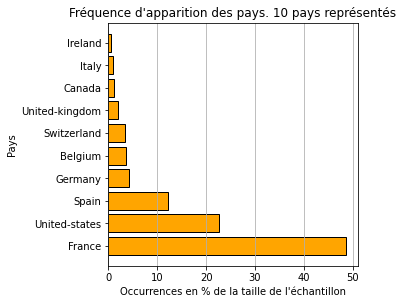

In [ ]:
get_countries_v2(filter_=10)

### 1.4 Indicateur categories

In [ ]:
def get_categories(list_=explor_df['categories'],
                  sample_=len(explor_df['categories']),
                  filter_=20):
    """Fonction qui retourne les différentes catégories contenues dans les éléments
    de la colonne caegories"""

    # Nettoyer la liste des countries tags
    temp_list = []
    for element in list_:
        try:
            for string in element.split(','):
                temp_list.append(string)
        # Prévoir le cas des NaN
        except AttributeError:
            pass

    temp_counter = Counter(temp_list).most_common(filter_)

    # Extraire la liste des pays et leur fréquence d'apparition
    categories, frequencies = zip(*temp_counter)
    frequencies = [frequency/sample_*100 for frequency in frequencies]

    #Tracer le graphique
    plt.figure(figsize=(math.sqrt(filter_*2), math.sqrt(filter_*2)))
    plt.title('Fréquence d\'apparition des catégories. {} catégories représentées'.format(filter_))
    plt.xlabel('Occurrences en % de la taille de l\'échantillon')
    plt.ylabel('Catégories')
    ax = plt.axes()
    ax.xaxis.grid() # vertical lines
    plt.barh(categories, frequencies, color='orange', edgecolor='k')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


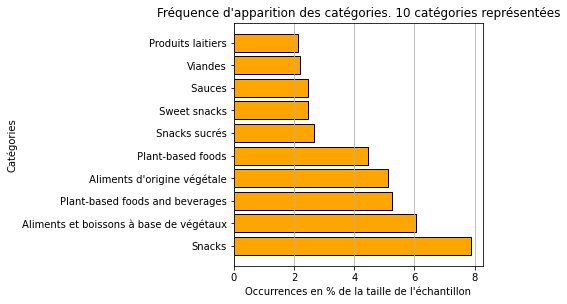

In [ ]:
get_categories(filter_=10)

### 1.5 Indicateur ingredients_text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


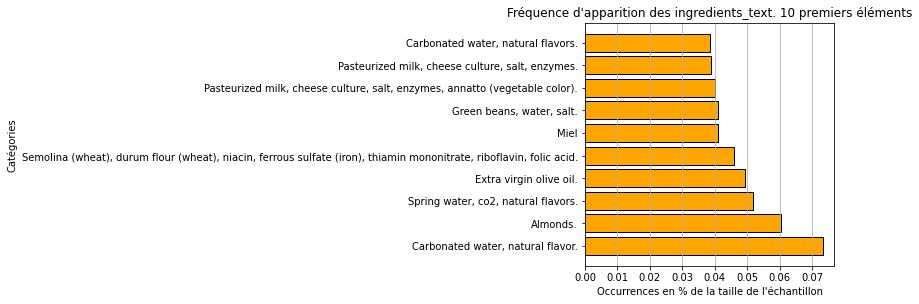

In [ ]:
get_pareto(explor_df, 'ingredients_text')

### 1.6 Indicateur additives_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


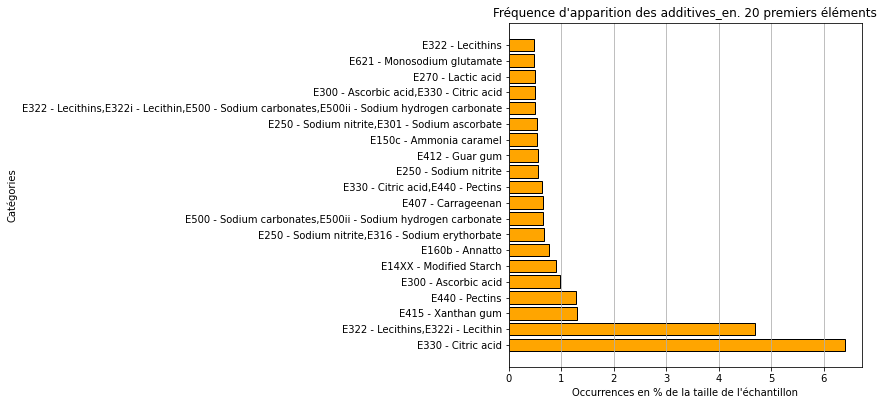

In [ ]:
get_pareto(explor_df, 'additives_en', filter_=20)

### 1.7 Indicateurs labels & labels_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


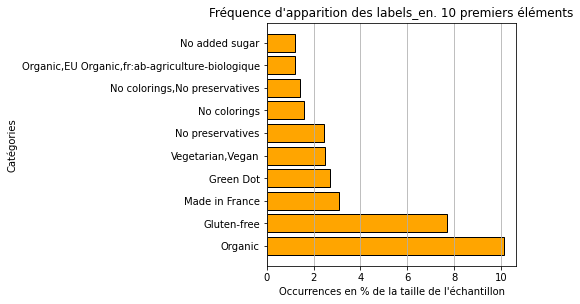

In [ ]:
#@title Titre par défaut
get_pareto(explor_df, 'labels_en')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


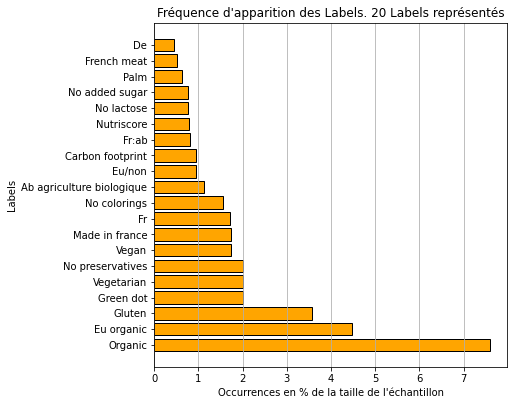

In [ ]:
get_countries_v2(list_=explor_df['labels_en'], filter_=20, parameter='Labels', n_=0)

### 1.8 Allergens

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


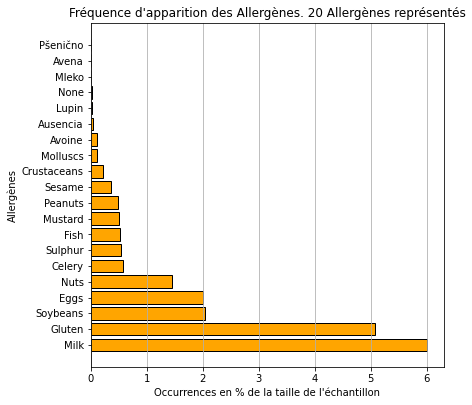

In [ ]:
get_countries_v2(list_=explor_df['allergens'], filter_=20, parameter='Allergènes')

### 1.9 Indicateur purchase_places

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


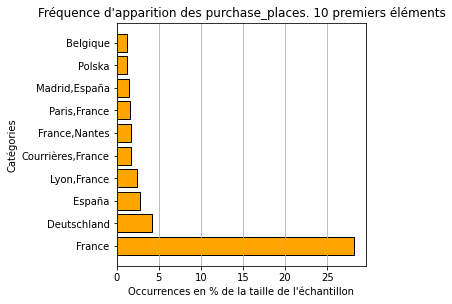

In [ ]:
get_pareto(explor_df, 'purchase_places')

Comment nettoyer les purchase_places ? Nous avons des pays, mais également des combinaisons "pays,ville", des combinaisons "ville,pays", ...

Extraire les pays de ces combinaisons semble compliqué. Il faudrait identifier lequel des deux mots de part et d'autre de la virgule est le pays. Pour cela, il faudrait vérifier que le mot fait partie de la liste des pays, liste disponible dans countries par exemple.

Malheureusement, cela n'est pas possible. Dans purchase_places, les pays sont enregistrés dans leur langue natale (par exemple Deutschland pour l'Allemagne), mais dans countries, ils sont enregistrés en anglais (Germany en l'occurrence).

Solution imaginée : faire appel à un traducteur en ligne pour passer d'une langue à l'anglais.

### 1.10 generic_name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


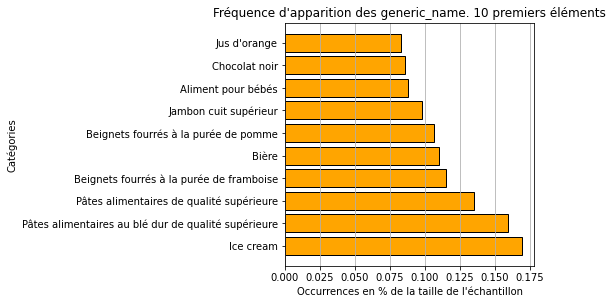

In [ ]:
get_pareto(explor_df, 'generic_name')

### 1.11 Indicateur manufacturing_places

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


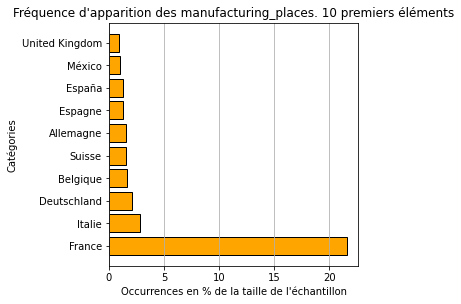

In [ ]:
get_pareto(explor_df, 'manufacturing_places')

### 1.12 Indicateur cities_tags

Le notebook ne réagit plus à partir de cette commande, saturation de la RAM ?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


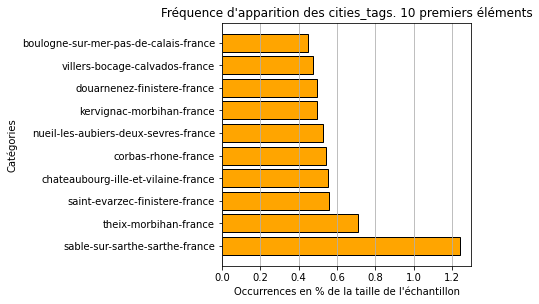

In [ ]:
get_pareto(explor_df, 'cities_tags')

In [ ]:
remaining_list = ['created_datetime',
                  'creator',
                  'countries_tags',
                  'categories',
                  'additives_en',
                  'labels_en',
                  'cholesterol_100g',
                  'stores',
                  'allergens']

# 2. Analyses multivariées

In [ ]:
explor_df = main_df[['created_datetime', 'creator', 'countries_tags', 'categories',
       'additives_en', 'labels_en', 'cholesterol_100g', 'stores', 'allergens', 'sugars_100g']]

## 2.1 Qualitative / Qualitative

### 2.1.1 stores / labels_en

**Question** : les labels sont-ils répartis uniformément selon les enseignes, ou au contraire, y a-t-il des enseignes qui se démarquent particulièrement par le nombre de labels ?

In [ ]:
stores_counter = Counter(explor_df['stores']).most_common()[:21]
labels_counter = Counter(explor_df['labels_en']).most_common()[:11]

In [ ]:
stores_shortlist = [item[0] for item in stores_counter if type(item[0]) == str]
labels_shortlist = [item[0] for item in labels_counter if type(item[0]) == str]

In [ ]:
firststores_df = explor_df[explor_df['stores'].isin(stores_shortlist)]

In [ ]:
firststores_df.head(5)

,created_datetime,creator,countries_tags,categories,additives_en,labels_en,cholesterol_100g,stores,allergens,sugars_100g
516,2017-03-14T21:30:29Z,twoflower,en:germany,"Imbiss, Süßwaren, Konfekt, Schokoladenkonfekt,...","E322 - Lecithins,E322i - Lecithin,E420 - Sorbi...","Sustainable farming,UTZ Certified,UTZ Certifie...",NaN,Lidl,"en:milk,en:nuts,en:soybeans,de:Pisatazien",51.5
782,2020-04-08T17:11:21Z,eduardo,en:spain,"Alimentos y bebidas de origen vegetal, Aliment...",NaN,"Vegetarian,Vegan",NaN,Mercadona,NaN,NaN
948,2017-02-01T11:13:57Z,kiliweb,en:france,"Snacks, Snacks sucrés, Beignets sucrés",NaN,NaN,NaN,Intermarché,NaN,12.7
1025,2019-04-25T11:53:58Z,cbou,en:france,NaN,E300 - Ascorbic acid,NaN,NaN,Intermarché,NaN,1.4
1353,2017-03-09T12:15:22Z,usda-ndb-import,en:united-states,NaN,"E330 - Citric acid,E440 - Pectins",NaN,NaN,Kroger,NaN,50.0


In [ ]:
X = 'stores'
Y = 'labels_en'

count = firststores_df[[X, Y]].pivot_table(index=X,
                                           columns=Y,
                                           aggfunc=len,
                                           margins=True)
count = count[labels_shortlist]
count.style.bar(align='mid', vmin=0, vmax=2789, color='grey')

labels_en,Organic,Gluten-free,Made in France,Green Dot,"Vegetarian,Vegan",No preservatives,No colorings,"No colorings,No preservatives","Organic,EU Organic,fr:ab-agriculture-biologique",No added sugar
stores,,,,,,,,,,
Aldi,15.000000,43.000000,28.000000,82.000000,113.000000,30.000000,4.000000,2.000000,3.000000,3.000000
Auchan,67.000000,158.000000,346.000000,348.000000,9.000000,55.000000,35.000000,36.000000,38.000000,20.000000
Carrefour,233.000000,133.000000,923.000000,253.000000,224.000000,97.000000,29.000000,62.000000,80.000000,39.000000
Casino,125.000000,32.000000,15.000000,96.000000,3.000000,38.000000,3.000000,24.000000,63.000000,9.000000
Colruyt,30.000000,16.000000,7.000000,34.000000,4.000000,6.000000,3.000000,1.000000,12.000000,5.000000
Cora,19.000000,12.000000,88.000000,112.000000,3.000000,44.000000,10.000000,28.000000,9.000000,21.000000
Delhaize,121.000000,70.000000,16.000000,86.000000,34.000000,40.000000,52.000000,36.000000,26.000000,36.000000
Franprix,25.000000,17.000000,10.000000,150.000000,2.000000,15.000000,8.000000,3.000000,11.000000,3.000000
Intermarché,40.000000,13.000000,64.000000,133.000000,nan,57.000000,14.000000,17.000000,33.000000,24.000000


### 2.1.2 stores / countries_tags

**Question** : les labels sont-ils répartis uniformément selon les pays, ou au contraire, y a-t-il des pays qui se démarquent particulièrement par le nombre de labels ?

In [ ]:
# Nettoyage de la liste de pays
hyphen_list = ['en:united-kingdom',
               'en:united-states']

temp_list = []

#df[df["A"].str.contains("Hello|Britain", na=False)]

for countrytags in explor_df['countries_tags']:
    try:
        for string in countrytags.split(','):
            try:
                if '-' in string and string not in hyphen_list:
                    string = string.split('-')[0]
                    temp_list.append(without_en(string))
                else:
                    temp_list.append(without_en(string))
            except TypeError:
                pass
    except AttributeError:
    #temp_list.append('NaN value')
        pass
    except TypeError:
        pass

In [ ]:
countriestags_counter = Counter(explor_df['countries_tags']).most_common()[:11]

In [ ]:
countriestags_shortlist = [item[0] for item in countriestags_counter if type(item[0]) == str]
countriestags_shortlist

['en:france',
 'en:united-states',
 'en:spain',
 'en:belgium',
 'en:germany',
 'en:switzerland',
 'en:united-kingdom',
 'en:canada',
 'en:france,en:germany',
 'en:france,en:spain',
 'en:italy']

In [ ]:
firstcountriestags_df = explor_df[explor_df['countries_tags'].isin(countriestags_shortlist)]
firstcountriestags_df.head(5)

,created_datetime,creator,countries_tags,categories,additives_en,labels_en,cholesterol_100g,stores,allergens,sugars_100g
0,2018-06-15T10:38:00Z,kiliweb,en:france,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1,2018-10-13T21:06:14Z,isagoofy,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-19T15:02:16Z,kiliweb,en:spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-11T14:09:21Z,del51,en:france,"Epicerie, Condiments, Sauces, Moutardes",NaN,fr:delois-france,NaN,courte paille,en:mustard,22.0
4,2019-06-08T18:56:13Z,openfoodfacts-contributors,en:france,Xsf,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = 'countries_tags'
Y = 'labels_en'

count = firstcountriestags_df[[X, Y]].pivot_table(index=X,
                                                  columns=Y,
                                                  aggfunc=len,
                                                  margins=True)
count = count[labels_shortlist]
count.style.bar(align='mid', vmin=0, vmax=33575, color='red')

labels_en,Organic,Gluten-free,Made in France,Green Dot,"Vegetarian,Vegan",No preservatives,No colorings,"No colorings,No preservatives","Organic,EU Organic,fr:ab-agriculture-biologique",No added sugar
countries_tags,,,,,,,,,,
en:belgium,572.000000,533.000000,67.000000,106.000000,298.000000,153.000000,148.000000,66.000000,35.000000,182.000000
en:canada,37.000000,529.000000,10.000000,1.000000,136.000000,119.000000,250.000000,18.000000,nan,129.000000
en:france,17021.000000,8173.000000,9816.000000,6201.000000,2321.000000,5333.000000,3650.000000,3846.000000,3911.000000,2003.000000
"en:france,en:germany",124.000000,104.000000,18.000000,82.000000,108.000000,43.000000,5.000000,1.000000,11.000000,12.000000
"en:france,en:spain",142.000000,551.000000,61.000000,102.000000,106.000000,69.000000,88.000000,41.000000,7.000000,95.000000
en:germany,185.000000,360.000000,6.000000,459.000000,728.000000,233.000000,21.000000,9.000000,3.000000,120.000000
en:italy,48.000000,580.000000,3.000000,3.000000,33.000000,113.000000,29.000000,10.000000,nan,36.000000
en:spain,161.000000,10969.000000,57.000000,1145.000000,1948.000000,773.000000,818.000000,595.000000,2.000000,546.000000
en:switzerland,577.000000,341.000000,76.000000,54.000000,601.000000,164.000000,49.000000,27.000000,4.000000,155.000000


## 2.2 Qualitative / quantitative

### 2.2.5 Automatisation

In [ ]:
def boxplot(conseq='cholesterol_100g', filter_=10, pot_cause='', begin_=0, end_=-1, sep_=','):
    """
    Function that takes as arguments an potential cause and a consequence.
    Returns a boxplot of the two arguments.
    """
    # Vérifier que la cause a bien été donnée
    if pot_cause == '':
        string = 'Veuillez indiquer une cause potentielle : \'pot_cause=...\''
        return print(string)

    # Extraction des colonnes utiles
    temp_df_ = explor_df[[conseq, pot_cause]]
    temp_df_ = temp_df_.dropna()

    # Création de la liste des éléments individuels de la colonne cause potentielle
    indiv_list = []
    for line in temp_df_[pot_cause].dropna():
        # Quand il y a plusieurs éléments
        for pot_cause_ in line.split(sep_):
            indiv_list.append(pot_cause_)

    # Création du counter
    pot_cause_counter = Counter(indiv_list)
    # Sélection des 10 premiers éléments
    pot_cause_10first = pot_cause_counter.most_common(filter_)
    # Extraction des noms des 10 premiers
    pot_cause_10first = [item[0][begin_:end_] for item in pot_cause_10first]

    # Graphique
    groupes = []
    for string in pot_cause_10first:
        groupes.append(temp_df_[temp_df_[pot_cause].str.contains(string, na=False)][conseq])
    plt.title('Lien entre {} et {}'.format(conseq, pot_cause))
    plt.xlabel(conseq)
    plt.ylabel(pot_cause)

    # Détermination de l'échelle de l'axe des abscisses
    moyenne = explor_df[conseq].mean()
    ecarttype = explor_df[conseq].std()
    #plt.xlim([-2, 90])

    bplot = plt.boxplot(groupes, labels=pot_cause_10first, showfliers=False,vert=False, patch_artist=True, showmeans=True)
    plt.setp(bplot["boxes"], facecolor='orange')
    return plt.show()

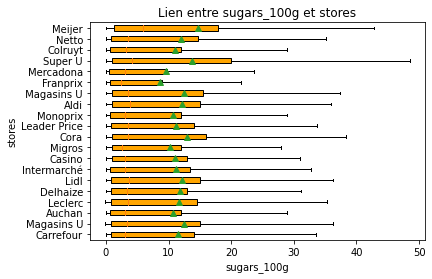

In [ ]:
boxplot(conseq='sugars_100g', pot_cause='stores', begin_=0, end_=31, filter_=20)

## 2.3 Quantitative / quantitative

### 2.3.1 cholesterol_100g & allergens

**Question** : Y a-t-il une corrélation entre le taux de cholesterol et la présence d'allergènes ?

In [ ]:
# Extraction des colonnes cholesterol et allergens
chol_aller_df = explor_df[['sugars_100g', 'allergens']]
# Elimination des lignes contenant des éléments nuls
chol_aller_df = chol_aller_df.dropna()

In [ ]:
# Création d'une colonne contenant le nombre d'allergènes
allergens_nb_list = []
for element in chol_aller_df['allergens']:
    allergens_nb_list.append(len(element.split(',')))
chol_aller_df['Allergens number'] = allergens_nb_list

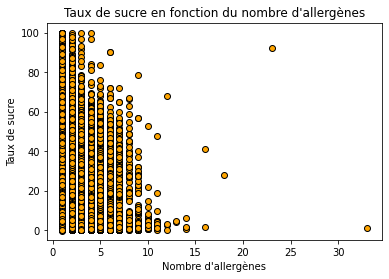

In [ ]:
X = chol_aller_df['Allergens number']
Y = chol_aller_df['sugars_100g']

plt.title('Taux de sucre en fonction du nombre d\'allergènes')
plt.xlabel('Nombre d\'allergènes')
plt.ylabel('Taux de sucre')
plt.ylim([-5, 105])
plt.scatter(X, Y, color='orange', edgecolors='k')

### 2.3.2 cholesterol_100g & additives_en

**Question** : Y a-t-il une corrélation entre le taux de cholesterol et la présence d'additifs ?

In [ ]:
# Extraction des colonnes cholesterol et additives_en
chol_add_df = explor_df[['cholesterol_100g', 'additives_en']]
# Elimination des lignes contenant des éléments nuls
chol_add_df = chol_add_df.dropna()

In [ ]:
# Création d'une colonne contenant le nombre d'allergènes
additives_nb_list = []
for element in chol_add_df['additives_en']:
    additives_nb_list.append(len(element.split(',')))
chol_add_df['Nombre d\'additifs'] = additives_nb_list

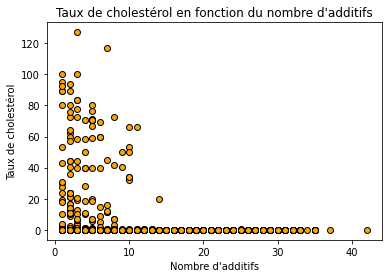

In [ ]:
X = chol_add_df['Nombre d\'additifs']
Y = chol_add_df['cholesterol_100g']

plt.title('Taux de cholestérol en fonction du nombre d\'additifs')
plt.xlabel('Nombre d\'additifs')
plt.ylabel('Taux de cholestérol')
plt.scatter(X, Y, color='orange', edgecolors='k')